In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time
data = []
datapath = '/home/bigdatas16/1301.csv'
data = pd.read_csv(datapath)

def Cl_move_1(data):
    dataList = range(data['Date'].size)
    List = []
    List.append(0)
    for i in dataList:
        tmp = data['Close'][i]
        List.append(tmp)
    tmpSeries = pd.Series(List)
    data['Close1']=tmpSeries
Cl_move_1(data)
def WMS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item - day + 1 >= 0:
            tmp = 100*(data['High'][item-day+1:item+1].max() - data['Close'][item])/(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['WMS' + str(day) +'_lag'] = tmpSeries
    
start = time.time()
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for i in dataList:
        if i - day + 1 >= 0:
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries
    
for i in range(5,65,5):
    MA(data,i)
for i in range(5,65,5):
    data["MA"+str(i)+"cross"] = data["Close1"][i:] - data["MA"+str(i)][i:]      
for i in range(5,60,5):
    data[("MA"+str(i))+("-MA"+str(i+5))] = data["MA"+str(i)][(i):] - data["MA" + str(5+i)][(i+5):]  
for i in range(18):
    WMS_lag(data,i+2)   
end = time.time()
print "Create features rsi : Time taken = %f second"%(end - start)  

Populating the interactive namespace from numpy and matplotlib
Create features rsi : Time taken = 128.651677 second


In [2]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries
UP_DOWN(data)

In [3]:
data.head(2)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,Close1,...,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,1998/1/3,14.19,14.3,14.08,14.19,"5,353","342,631",0.7874,31.68,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1998/1/5,14.19,14.3,13.97,13.97,"8,297","528,813",-1.5625,31.19,14.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
data.info()
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Close1','Volume_n','Volume_m','return','PE'
                   ,'MA5','MA10','MA15','MA20','MA25','MA30','MA35','MA40'
                   ,'MA45','MA50','MA55','MA60'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 64 columns):
Date         4620 non-null object
Open         4620 non-null float64
High         4620 non-null float64
Low          4620 non-null float64
Close        4620 non-null float64
Volume_n     4620 non-null object
Volume_m     4620 non-null object
return       4620 non-null float64
PE           4620 non-null float64
Close1       4620 non-null float64
MA5          4620 non-null float64
MA10         4620 non-null float64
MA15         4620 non-null float64
MA20         4620 non-null float64
MA25         4620 non-null float64
MA30         4620 non-null float64
MA35         4620 non-null float64
MA40         4620 non-null float64
MA45         4620 non-null float64
MA50         4620 non-null float64
MA55         4620 non-null float64
MA60         4620 non-null float64
MA5cross     4615 non-null float64
MA10cross    4610 non-null float64
MA15cross    4605 non-null float64
MA20cross    4600 non

In [5]:
data1.head(1)

,MA5cross,MA10cross,MA15cross,MA20cross,MA25cross,MA30cross,MA35cross,MA40cross,MA45cross,MA50cross,...,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
data1.columns[1:30]

Index([u'MA10cross', u'MA15cross', u'MA20cross', u'MA25cross', u'MA30cross',
       u'MA35cross', u'MA40cross', u'MA45cross', u'MA50cross', u'MA55cross',
       u'MA60cross', u'MA5-MA10', u'MA10-MA15', u'MA15-MA20', u'MA20-MA25',
       u'MA25-MA30', u'MA30-MA35', u'MA35-MA40', u'MA40-MA45', u'MA45-MA50',
       u'MA50-MA55', u'MA55-MA60', u'WMS2_lag', u'WMS3_lag', u'WMS4_lag',
       u'WMS5_lag', u'WMS6_lag', u'WMS7_lag', u'WMS8_lag'],
      dtype='object')

In [7]:
data1.columns[30:60]

Index([u'WMS9_lag', u'WMS10_lag', u'WMS11_lag', u'WMS12_lag', u'WMS13_lag',
       u'WMS14_lag', u'WMS15_lag', u'WMS16_lag', u'WMS17_lag', u'WMS18_lag',
       u'WMS19_lag', u'UP_DOWN'],
      dtype='object')

In [8]:
data1 = data1.fillna(-1)
cols = data1.columns.tolist()
cols[41]

'UP_DOWN'

In [9]:
data1 = data1[[cols[41]] + cols[0:40]]
n = len(data['Date']) / 5
m = len(data['Date']) + 1 - n
train_data = data1.iloc[:m,:]

In [10]:
train_data.head(1)

,UP_DOWN,MA5cross,MA10cross,MA15cross,MA20cross,MA25cross,MA30cross,MA35cross,MA40cross,MA45cross,...,WMS9_lag,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag
0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])

assembler1 = VectorAssembler(inputCols=['MA10cross','MA15cross','MA20cross','MA25cross','MA30cross',
                                        'MA35cross','MA40cross','MA45cross','MA50cross','MA55cross',
                                        'MA60cross','MA5-MA10','MA10-MA15','MA15-MA20','MA20-MA25',
                                        'MA25-MA30','MA30-MA35','MA35-MA40','MA40-MA45','MA45-MA50',
                                        'MA50-MA55','MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag',
                                        'WMS5_lag','WMS6_lag','WMS7_lag','WMS8_lag',u'WMS9_lag', u'WMS10_lag',
                                        'WMS11_lag','WMS12_lag','WMS13_lag','WMS14_lag', 'WMS15_lag',
                                        'WMS16_lag','WMS17_lag','WMS18_lag'], outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=['MA10cross','MA15cross','MA20cross','MA25cross','MA30cross',
                                        'MA35cross','MA40cross','MA45cross','MA50cross','MA55cross',
                                        'MA60cross','MA5-MA10','MA10-MA15','MA15-MA20','MA20-MA25',
                                        'MA25-MA30','MA30-MA35','MA35-MA40','MA40-MA45','MA45-MA50',
                                        'MA50-MA55','MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag',
                                        'WMS5_lag','WMS6_lag','WMS7_lag','WMS8_lag',u'WMS9_lag', u'WMS10_lag',
                                        'WMS11_lag','WMS12_lag','WMS13_lag','WMS14_lag', 'WMS15_lag',
                                        'WMS16_lag','WMS17_lag','WMS18_lag'],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

start = time.time()

cv5_test_error = []    
maxBins_numTrees_maxDepth = []    
for l in range(15,35,5):
    for j in range(1,8,1):
        for k in range(1,10,1):
            Test_Error = []
            for i in range(0,5):
                labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
                featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
                #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
                rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j,maxBins = l)
                # Chain indexers and forest in a Pipeline
                pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
                model = pipeline.fit(result_sql[i])
                predictions = model.transform(cross_sql[i])
                evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel"
                                                              , predictionCol="prediction",metricName = "precision")
                accuracy = evaluator.evaluate(predictions)
                print("[%g,%g,%g] : Test Error(%d) = %g" % (k,j,l,i,1.0 - accuracy))
                Test_Error.append(1.0 - accuracy)
            cv5_test_error.append(mean(Test_Error))
            maxBins_numTrees_maxDepth.append([k,j,l])

end = time.time()
print "Cross Validation 5 Folds Hyperparameter Tuning : Time taken = %f second"%(end - start)
        
    
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(maxBins_numTrees_maxDepth[i],mintest)  

[1,1,15] : Test Error(0) = 0.449256
[1,1,15] : Test Error(1) = 0.419486
[1,1,15] : Test Error(2) = 0.448649
[1,1,15] : Test Error(3) = 0.479378
[1,1,15] : Test Error(4) = 0.482432
[2,1,15] : Test Error(0) = 0.351827
[2,1,15] : Test Error(1) = 0.427605
[2,1,15] : Test Error(2) = 0.440541
[2,1,15] : Test Error(3) = 0.488168
[2,1,15] : Test Error(4) = 0.482432
[3,1,15] : Test Error(0) = 0.418133
[3,1,15] : Test Error(1) = 0.427605
[3,1,15] : Test Error(2) = 0.440541
[3,1,15] : Test Error(3) = 0.490872
[3,1,15] : Test Error(4) = 0.486486
[4,1,15] : Test Error(0) = 0.35724
[4,1,15] : Test Error(1) = 0.427605
[4,1,15] : Test Error(2) = 0.436486
[4,1,15] : Test Error(3) = 0.486815
[4,1,15] : Test Error(4) = 0.487838
[5,1,15] : Test Error(0) = 0.362652
[5,1,15] : Test Error(1) = 0.427605
[5,1,15] : Test Error(2) = 0.440541
[5,1,15] : Test Error(3) = 0.488168
[5,1,15] : Test Error(4) = 0.485135
[6,1,15] : Test Error(0) = 0.35318
[6,1,15] : Test Error(1) = 0.427605
[6,1,15] : Test Error(2) = 0.4

In [12]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=['MA10cross','MA15cross','MA20cross','MA25cross','MA30cross',
                                        'MA35cross','MA40cross','MA45cross','MA50cross','MA55cross',
                                        'MA60cross','MA5-MA10','MA10-MA15','MA15-MA20','MA20-MA25',
                                        'MA25-MA30','MA30-MA35','MA35-MA40','MA40-MA45','MA45-MA50',
                                        'MA50-MA55','MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag',
                                        'WMS5_lag','WMS6_lag','WMS7_lag','WMS8_lag',u'WMS9_lag', u'WMS10_lag',
                                        'WMS11_lag','WMS12_lag','WMS13_lag','WMS14_lag', 'WMS15_lag',
                                        'WMS16_lag','WMS17_lag','WMS18_lag'],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 8,maxDepth = 7,maxBins = 20)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=['MA10cross','MA15cross','MA20cross','MA25cross','MA30cross',
                                        'MA35cross','MA40cross','MA45cross','MA50cross','MA55cross',
                                        'MA60cross','MA5-MA10','MA10-MA15','MA15-MA20','MA20-MA25',
                                        'MA25-MA30','MA30-MA35','MA35-MA40','MA40-MA45','MA45-MA50',
                                        'MA50-MA55','MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag',
                                        'WMS5_lag','WMS6_lag','WMS7_lag','WMS8_lag',u'WMS9_lag', u'WMS10_lag',
                                        'WMS11_lag','WMS12_lag','WMS13_lag','WMS14_lag', 'WMS15_lag',
                                        'WMS16_lag','WMS17_lag','WMS18_lag'],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
#accuracy = evaluator.evaluate(predictions)
#accuracy

In [13]:
pd.DataFrame(['MA10cross','MA15cross','MA20cross','MA25cross','MA30cross',
              'MA35cross','MA40cross','MA45cross','MA50cross','MA55cross',
              'MA60cross','MA5-MA10','MA10-MA15','MA15-MA20','MA20-MA25',
              'MA25-MA30','MA30-MA35','MA35-MA40','MA40-MA45','MA45-MA50',
              'MA50-MA55','MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag',
              'WMS5_lag','WMS6_lag','WMS7_lag','WMS8_lag',u'WMS9_lag', u'WMS10_lag',
              'WMS11_lag','WMS12_lag','WMS13_lag','WMS14_lag', 'WMS15_lag',
              'WMS16_lag','WMS17_lag','WMS18_lag'])

,0
0,MA10cross
1,MA15cross
2,MA20cross
3,MA25cross
4,MA30cross
5,MA35cross
6,MA40cross
7,MA45cross
8,MA50cross
9,MA55cross


In [14]:
print(model.stages[2]._call_java('toDebugString'))

RandomForestClassificationModel (uid=rfc_b1af26a67bc9) with 8 trees
  Tree 0 (weight 1.0):
    If (feature 14 <= 0.25659999999999883)
     If (feature 27 <= 30.270270270270103)
      If (feature 1 <= 2.477333333333334)
       If (feature 17 <= -0.5332857142857321)
        If (feature 38 <= 22.929936305732443)
         Predict: 0.0
        Else (feature 38 > 22.929936305732443)
         If (feature 29 <= 20.353982300884947)
          Predict: 1.0
         Else (feature 29 > 20.353982300884947)
          Predict: 0.0
       Else (feature 17 > -0.5332857142857321)
        If (feature 5 <= -1.9320000000000022)
         If (feature 32 <= 62.81690140845071)
          If (feature 2 <= -0.7294999999999963)
           Predict: 1.0
          Else (feature 2 > -0.7294999999999963)
           Predict: 1.0
         Else (feature 32 > 62.81690140845071)
          If (feature 25 <= 25.274725274724926)
           Predict: 0.0
          Else (feature 25 > 25.274725274724926)
           Predict: 1.0
   

In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
prediction_1101 = predictions.select("prediction", "indexedLabel")
prediction_1101_pandas = prediction_1101.toPandas()
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,328,152
1.0,312,131


In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

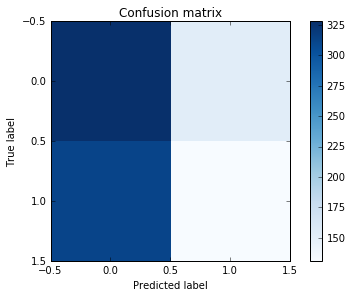

In [18]:
plot_confusion_matrix(cm)
plt.show()

當沖策略：每天都會買賣，預測漲買一張而預測跌則放空一張

一張一千股，買一張的價格等於股價乘上股數

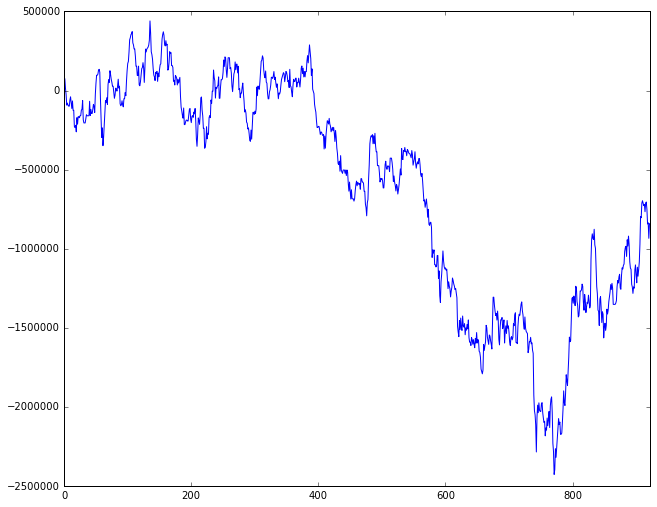

In [19]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
a = result2['profit'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [20]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit
0,75.02,74.93,1.0,1.0,0.09,6743.7
1,74.11,75.02,0.0,-1.0,-0.91,68268.2
2,73.57,74.39,0.0,1.0,-0.82,-60999.8
3,72.94,73.48,0.0,1.0,-0.54,-39679.2
4,73.03,73.93,0.0,1.0,-0.90,-66537.0


In [21]:
result2['processing fee1'] = np.where(result2['prediction'] == 1,1000*(result2['Close']*(4.425/1000.0) + result2['Open']*(1.425/1000.0))*1
                                      ,1000*(result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)))
result2['profit_r_fee'] = result2['profit'] -  result2['processing fee1']

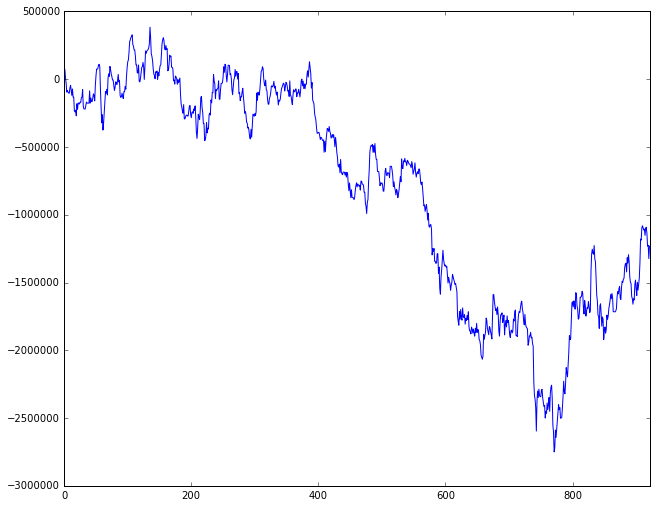

In [22]:
b = result2['profit_r_fee'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
b.plot()

In [23]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
data_PE = data[['PE']][(4621-n):4622].values
data_PE = pd.DataFrame(data_PE,columns = ['PE'])
result2 = pd.concat([data_PE, result2], axis=1)

In [24]:
result2.head()

,PE,Close,Open,test,prediction,Cl - Op,profit
0,20.00,75.02,74.93,1.0,1.0,0.09,6743.7
1,19.76,74.11,75.02,0.0,-1.0,-0.91,68268.2
2,19.62,73.57,74.39,0.0,1.0,-0.82,-60999.8
3,19.45,72.94,73.48,0.0,1.0,-0.54,-39679.2
4,37.50,73.03,73.93,0.0,1.0,-0.90,-66537.0


In [25]:
result2['profit2'] = 0.0
result2['profit2'][0] = 0 
for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1 and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] 
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1 and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * result2['Open'][i+1]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['profit2'][i+1] = result2['profit2'][i] 

In [26]:
result2.head()

,PE,Close,Open,test,prediction,Cl - Op,profit,profit2
0,20.00,75.02,74.93,1.0,1.0,0.09,6743.7,0.0
1,19.76,74.11,75.02,0.0,-1.0,-0.91,68268.2,0.0
2,19.62,73.57,74.39,0.0,1.0,-0.82,-60999.8,0.0
3,19.45,72.94,73.48,0.0,1.0,-0.54,-39679.2,0.0
4,37.50,73.03,73.93,0.0,1.0,-0.90,-66537.0,0.0


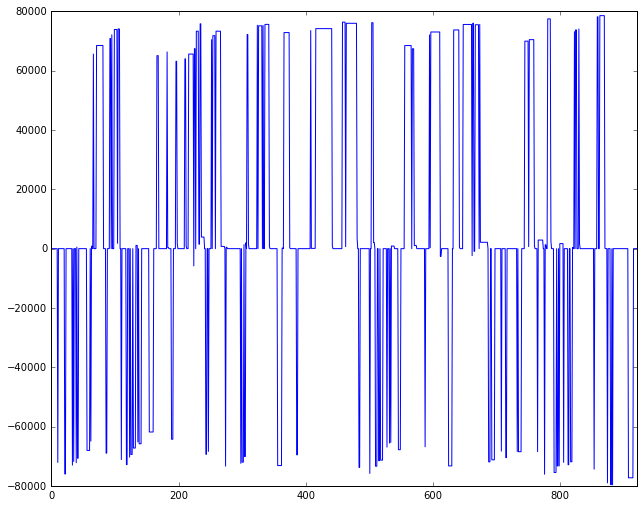

In [27]:
result2['profit2'].plot()

In [28]:
result2['processing_fee_2'] = 0.0
result2['processing_fee_2'][0] = 0#(-1) * result2['Open'][0]

for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1 and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * (-1) * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1 and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*(4.425/1000.0)
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

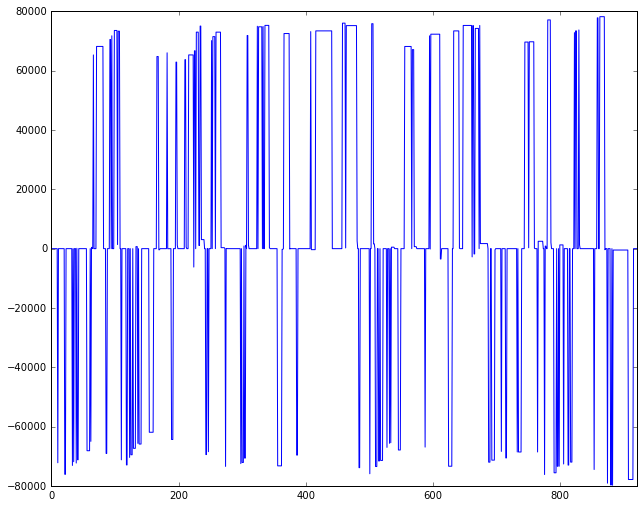

In [29]:
result2['processing_fee_2'].plot()#[1101:2301].plot()